In [11]:
%matplotlib notebook
import requests
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
from helper import *

In [12]:
class SOURCES:
    DISTRICTS = 'https://api.covid19india.org/csv/latest/district_wise.csv'
    STATEWISE_DAILY = 'https://api.covid19india.org/csv/latest/state_wise_daily.csv'

In [13]:
df = pd.read_csv(SOURCES.DISTRICTS)
print(df.columns)
display(df[df.State_Code=='TN'])

Index(['SlNo', 'State_Code', 'State', 'District_Key', 'District', 'Confirmed',
       'Active', 'Recovered', 'Deceased', 'Migrated_Other', 'Delta_Confirmed',
       'Delta_Active', 'Delta_Recovered', 'Delta_Deceased', 'District_Notes',
       'Last_Updated'],
      dtype='object')


,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
605,0,TN,Tamil Nadu,TN_Railway Quarantine,Railway Quarantine,428,0,428,0,0,0,0,0,0,NaN,NaN
606,0,TN,Tamil Nadu,TN_Airport Quarantine,Airport Quarantine,2101,5,2094,2,0,0,-2,2,0,NaN,NaN
607,0,TN,Tamil Nadu,TN_Other State,Other State,0,0,0,0,0,0,0,0,0,NaN,NaN
608,544,TN,Tamil Nadu,TN_Ariyalur,Ariyalur,16217,180,15793,244,0,14,-10,23,1,NaN,NaN
609,732,TN,Tamil Nadu,TN_Chengalpattu,Chengalpattu,164469,1127,160920,2422,0,96,-8,103,1,NaN,NaN
610,545,TN,Tamil Nadu,TN_Chennai,Chennai,542555,2129,532047,8379,0,177,9,164,4,[July 22]: 444 backdated deceased entries adde...,NaN
611,546,TN,Tamil Nadu,TN_Coimbatore,Coimbatore,234244,2229,229778,2237,0,198,-15,212,1,NaN,NaN
612,547,TN,Tamil Nadu,TN_Cuddalore,Cuddalore,61887,641,60416,830,0,54,-22,76,0,NaN,NaN
613,548,TN,Tamil Nadu,TN_Dharmapuri,Dharmapuri,26656,233,26183,240,0,23,-8,31,0,NaN,NaN
614,549,TN,Tamil Nadu,TN_Dindigul,Dindigul,32420,101,31688,631,0,7,-5,11,1,NaN,NaN


In [14]:
df = pd.read_csv(SOURCES.STATEWISE_DAILY)
df['Date'] = pd.to_datetime(df.Date)
data_until = df.Date.max()
print(data_until)

2021-08-22 00:00:00


In [15]:
print(df.columns)
df[['Date', 'Status', 'TN']].tail(15)

STATES = {'TT':'TT',
          'AN':'AN',
          'AP':'Andhra Pradesh',
          'AR':'AR',
          'AS':'Assam',
          'BR':'Bihar',
          'CH':'CH',
         'KA':'Karnataka', 
          'KL':'Kerala',
       'MH':'Maharashtra',
           'OR':'Orissa',
           'TN':'Tamil Nadu'}

Index(['Date', 'Date_YMD', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH',
       'CT', 'DN', 'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL',
       'LA', 'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ',
       'SK', 'TN', 'TG', 'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')


## Cases

<IPython.core.display.Javascript object>


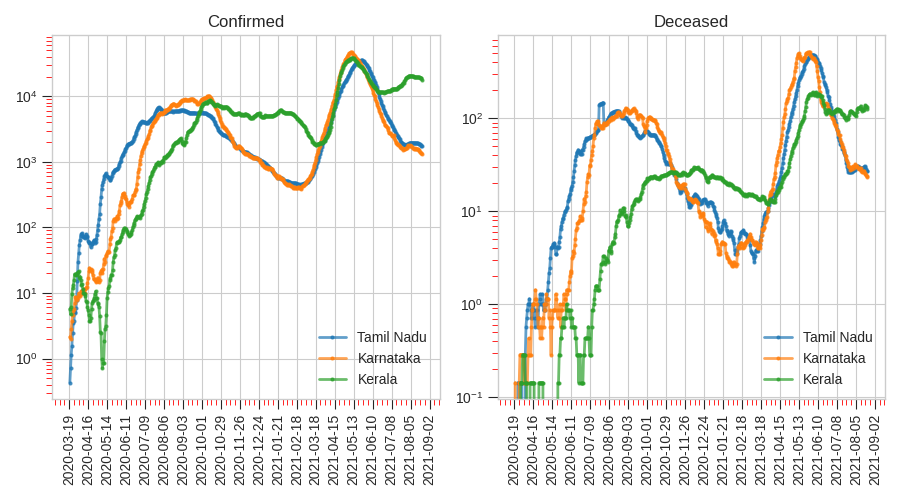

In [17]:
STATUSES = ('Confirmed', 'Recovered', 'Deceased',)
def plot_state_cases(states, statuses=STATUSES, ax=None, log=False, roll_days=7, ndays=100):    
    if isinstance(states, str):
        states = [states]

    if not ax:
        _, ax = plt.subplots(ncols=len(statuses), figsize=(9,5), sharex=True)
        
    for i, status in enumerate(statuses):
        for state in states:        
            df_state = df[df.Status==status][['Date', state]]
            if ndays:
                df_state = df_state.tail(min(ndays, df_state.shape[0]))
            ax[i].plot(df_state.Date, df_state[state].rolling(roll_days).mean(), linewidth=2, marker='o', label=STATES.get(state, state), markersize=2, alpha=0.7)
                
        pretty_plot(ax[i], log=log, title=status)
        
    
# plot_state_cases(['TN', 'KA', 'KL'], log=True, statuses=('Confirmed', 'Deceased',), ndays=150, roll_days=1)
plot_state_cases(['TN', 'KA', 'KL'], log=True, statuses=('Confirmed', 'Deceased',), ndays=0, roll_days=7)

In [7]:
df.columns

Index(['Date', 'Date_YMD', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH',
       'CT', 'DN', 'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL',
       'LA', 'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ',
       'SK', 'TN', 'TG', 'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')